# COGS 108 - Final Project 54

# Overview

In this project, we webscraped movie data, particularly movie budgets, ratings(metascore), release dates, and domestic/worldwide revenues, in order to create a dataset consisting of 2643 films and from it, analayze revenue as a function of the other variables. An ordinary leaset square (OLS) linear regression and a machine learning model are used to examine the relationship between the variables for the purpose of predicting movie revenue. As a result of our analysis, we found that rating and budget have positive relationships with revenue while release date influences revenue to a lesser degree, which corresponds to our hypothesis.

# Names

- Morris Chen
- Rene Robert Ndizeye
- Can Liu
- Handan Zhang

# Group Members IDs

- A14748900
- A14717762
- A14895335
- A13797888

# Research Question

For a movie, given a production budget B, a metascore S, release month M and year Y, what is the predictive success in terms of domestic gross D and worldwide gross W?

## Background and Prior Work

Related projects:

Alex Otleanu has done a project aiming to recommend a single website for accurate movie ratings that people can rely on before they make the decision to see a film. For four popular movie websites (IMDB, Rotten Tomatoes, Metacritic, Fandango), he looked at the different distributions of ratings. He found out that Metascore rating distribution mostly resembles a normal distribution and has the least correlation with Fandango, which is the most biased rating among the four. 


This gives us the reason to chose Metacritic score as movie rating scores because it is normally distributed and most importantly, contains ratings from professional movie critics before the movies are released


Link: https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/


Scott Wallsten estimated a multivariate regression for the influence of ratings (data from Rotten Tomatoes and IMDB) on revenue. He found that each additional percentage of ‘’freshness” is correlated with about 1.12 million in additional worldwide revenues, while an additional point on IMDB can bring an additional 38 million. Such strong correlations between ratings and revenue suggest that websites like these are good places for movie makers to understand their audiences’ tastes. 


Link: https://techpolicyinstitute.org/2017/09/15/rotten-tomatoes-and-imdb-reviews-strongly-correlated-with-movie-revenues/


Another study by Yves Bergquist showed that there was no correlation between Rotten Tomatoes scores with box office returns or opening weekend box office in 2017. 


Link: https://medium.com/vantage/cognitive-hollywood-part-1-data-shows-box-office-economics-in-turmoil-411a4b22f858


Github user soniasharma has used numerical data (date released, user rating, run time, budget, etc, but excluded metascore) to predict movie revenue. We learned from her approach to do our data visualization.


Link: http://rstudio-pubs-static.s3.amazonaws.com/223166_cb9ad69587134fef943b39e5645269f9.html


All four projects above have used data science approaches to study the factors that might influence a film’s box office performance. In our study, we will apply what we have learned in class to build on their methods and findings to investigate the potential relationships on another level.


# Hypothesis


In this project, we focus on four parameters that we believe to be good predictors of a movie's success at the box office: 

Budget, Metascore(Rating), Month of release, Year of release.



We hypothesize that a movie’s budget will be the strongest indicator of a movie’s revenue with a positive relationship between a film budget and domestic/worldwide revenue since a movie’s budget should reflect the quality of its cast members, production, and marketing.

We also expect professional movie rating scores (metascore) to have a positive correlation with movie revenue but not as great. 
Although another study found no relationship between movie rating score and revenue, we still think there might be a positive relationship between ratings and revenue. A higher rating score indicates a better production and a better audience experience, meaning more people are willing to watch it in theaters. Meanwhile, a lot of audiences will actually refer to the professional ratings that are released online before the movie is released to the audience, with a higher score making it more desirable to watch the film in theaters.

The month of release may have varying degrees of influence on revenue, as seasonality might influence boxoffice. Movies released during summer or the holiday season are able to attract larger audiences since people take time off work or school during these times, thus resulting in higher revenue. On the other hand, we expect offseason months, such as September, to be a negative predictor of revenue. The year of release should also have positive relationship with revenue since it is clear that movies are earning more every year from the fact that box office records are broken every year. This can be due to a variety of reasons such as inflation, movie companies increasing their investment in movie production and advertising, and the movie market maturing over the years. In general, new productions are more likely to earn more than productions 5 years ago.

# Datasets

In our original proposal, we proposed to use datasets that had already been collected and compiled. However, since we are not confident about the accuracy of the already available data, we decided to use webscraping to gather data directly from the website (IMDB & the Numbers), using the webscraping method we have learned in class.


1. IMDB dataset

Link: https://www.imdb.com/search/title?title_type=feature&release_date=2000-01-01


Number of datapoints: 4012 


Variables included: The website contains almost any information your might want for a specific film but for our project, we only scraped the title of the film, year of release, the metasocre, and the domestic gross.


Source: The dataset is scraped from the official website of IMDb (Internet Movie Database), one of the most popular and authoritative sources for film-related information, ratings, and reviews. All film-related information is reported by film companies or provided by registered contributors. Ratings and reviews are gathered through public, anonymous postings and reviews.


2. The Numbers dataset


Link: https://www.the-numbers.com/movie/budgets/all/5701


Number of datapoints: 5737


Variables include: release date, name of the movie, production budget, domestic gross, worldwide gross


Source: The Numbers is a movie industry data website tracking box office revenues. Data is not stored as downloadable files but as an online table (unstructured data, HTML), with each row presenting one film’s information. As the website describes, budget data is difficult to gather because sometimes they are kept secret or are inflated /reduced for accounting tricks. There might be “gaps and disputed figures”, but generally, they are as accurate as possible and reliable.


3. Online IMDB dataset which includes genre


Link: https://github.com/soniasharma/MovieRevenuePrediction/blob/master/IMDB%20Analysis.ipynb


Number of datapoints: 1600+


Variables: movie title, genres


Source: this is a dataset collected by soniasharma on a similar movie related data project. We used it for the exploration of the influnece of genres on movie revenue but did not included this in our linear model. 


Final Dataset


The final dataset used for predicting revene was the combination of merging the first two datasets by their movie title and year columns

Final number of datapoints: 2643.

# Setup

In [3]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (24, 10)

import scipy.stats as stats
from scipy.stats import normaltest

from sklearn.preprocessing import LabelBinarizer

# packages helpful for webscraping
import requests
from requests import get
import bs4
from bs4 import BeautifulSoup

import requests

# Statmodels & patsy
import patsy
import statsmodels.api as sm

#import json
from pandas.io.json import json_normalize
import scipy.stats as stats

import random

# scikit-learn imports
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

# Data Cleaning

1. Webscraping for the first dataset from IMDB because it comtains metascore and more accurate domestic revenue data. The website contains a variety of data but we are only interested in scraping for movie title, year, metascore, and revenue. The dataset is the first 4000 results from sorting by revenue and restricting results to movies from the US released after the year 2000

In [4]:
movies = []
years = []
metascores = []
revenues = []
headers = {"Accept-Language": "en-US, en;q=0.5"}
pages = [str(i) for i in range(1, 4002, 250)]

for page in pages:
    response = get('https://www.imdb.com/search/title?title_type=feature&release_date=2000-01-01,'
                   + '2019-12-31&countries=us&sort=boxoffice_gross_us,desc&count=250&start='
                   + page + '&ref_=adv_nxt', headers=headers)        
    soup = BeautifulSoup(response.text, 'html.parser')
    containers = soup.find_all('div', class_='lister-item mode-advanced')
        
    for container in containers:
        # Check for metascore since the primary purpose of this dataset is to obtain the metascore
        if container.find('div', class_='ratings-metascore') is not None:
            movies.append(container.h3.a.text)
            years.append(container.h3.find('span', class_='lister-item-year').text)
            metascores.append(int(container.find('span', class_='metascore').text))
            revenue = container.find_all('span', attrs = {'name':'nv'}, limit=2)
            if len(revenue) == 2:
                revenues.append(revenue[1]['data-value'])
            else:
                revenues.append(0)

df = pd.DataFrame({'title': movies,'year': years,'metascore': metascores,'domestic_gross': revenues})

dataset1 = df.copy()
print(df.shape)
df.head() 

(4014, 4)


,title,year,metascore,domestic_gross
0,Star Wars: Episode VII - The Force Awakens,(2015),81,"936,662,225"
1,Avengers: Endgame,(2019),78,"825,825,552"
2,Avatar,(2009),83,"760,507,625"
3,Black Panther,(2018),88,"700,059,566"
4,Avengers: Infinity War,(2018),68,"678,815,482"


In [5]:
dataset1 = pd.read_csv('dataset1.csv')
print(dataset1.shape)
dataset1.head()

(4014, 4)


,title,year,metascore,domestic_gross
0,Star Wars: Episode VII - The Force Awakens,(2015),81,"936,662,225"
1,Avengers: Endgame,(2019),78,"824,436,903"
2,Avatar,(2009),83,"760,507,625"
3,Black Panther,(2018),88,"700,059,566"
4,Avengers: Infinity War,(2018),68,"678,815,482"


2. Webscraping the second dataset from the Numbers website for its budget and worldwide revenue data.

In [4]:
url = 'https://www.the-numbers.com/movie/budgets/all'
pages = [str(i) for i in range(101, 5702, 100)]
pages = [url]+[(url+'/{0}').format(page) for page in pages]

df_numbers = pd.DataFrame(columns = ['index','date','title','budget',
                                     'domestic_gross','worldwide_gross'],
                          index=range(0,5836)) #index needs update everytime
row_marker = -1
for page in pages:
    # specify webpage we want to scrape 
    req = requests.get(page)
    soup = BeautifulSoup(req.content, 'html.parser') # get contents of web page

    num_table = soup.findAll('table')#get table
    tbl1 = num_table[0]

    # fill in the contents for our first table
    for row in tbl1.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td') # different tag than above for table contents
        for column in columns:
            df_numbers.iat[row_marker,column_marker] = column.get_text()
            column_marker += 1
        row_marker += 1

dataset2.to_csv('dataset2.csv', index=False) # Save dataset

In [6]:
dataset2 = pd.read_csv('dataset2.csv')
print(dataset2.shape)
dataset2.head()

(5836, 6)


,index,date,title,budget,domestic_gross,worldwide_gross
0,1.0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3.0,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
3,4.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
4,5.0,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"


Since the webscrape data contain a lot of strings that are unnecessary, we write a function to get rid of extra characters and convert month from string to numbers.

In [7]:
def replace_str(text, conditions):
    for string, cond in conditions.items():
        text = text.replace(string, cond)
    return text

def standardize_str(string):    
    cond = {'ep.': 'episode', ',': '', ':': '', '.': '', '\"': '', '!': '', '$': '', '?': '', 
            '(': '', ')': '', '#': '', '&': 'and', '-': '', '\'': ''}
    string = string.lower().strip()
    string = replace_str(string, cond).strip()
    return string

def standardize_num(num):
    cond = {',': '', '.': '', '(': '', ')': '', 'I': '', 'X': '', 'V': '', '$': ''}
    num = num.strip()
    num = int(replace_str(num, cond).strip())
    return num

def numeric_month(month):
    month = month[:3]
    cond = {'jan': '1', 'feb': '2', 'mar': '3', 'apr': '4', 'may': '5', 'jun': '6', 'jul': '7', 
            'aug': '8', 'sep': '9', 'oct': '10', 'nov': '11', 'dec': '12'}
    return replace_str(month, cond)

For both datasets, we cleaned them by:

1. Dropping all observations that don't contain information of both budget and revenue. Some observation are incomplete, missing vital information such as budget or revenue, and thus cannot be used for prediction purposes. 
2. Standardizing and converting the data into appropriate datatypes. Most of data we websrcaped are string format, so we need to get rid of '$', ',', etc, and convert them into integers.

Cleaning the first dataset

In [8]:
dataset1 = dataset1.astype(str)

dataset1['title'] = dataset1['title'].apply(standardize_str)
dataset1['year'] = dataset1['year'].apply(standardize_num)
dataset1['domestic_gross'] = dataset1['domestic_gross'].apply(standardize_num)

dataset1.head()

,title,year,metascore,domestic_gross
0,star wars episode vii the force awakens,2015,81,936662225
1,avengers endgame,2019,78,824436903
2,avatar,2009,83,760507625
3,black panther,2018,88,700059566
4,avengers infinity war,2018,68,678815482


Cleaning the second dataset

In [9]:
dataset2 = dataset2.dropna()
dataset2 = dataset2.astype(str)

dataset2['date'] = dataset2['date'].apply(standardize_str)
dataset2['title'] = dataset2['title'].apply(standardize_str)
dataset2['budget'] = dataset2['budget'].apply(standardize_num)
dataset2['worldwide_gross'] = dataset2['worldwide_gross'].apply(standardize_num)

dataset2['year'] = dataset2.date.apply(lambda x: int(x[-4:]))
dataset2['month_str'] = dataset2.date.apply(lambda x: x[:3])
dataset2['month_num'] = dataset2.date.apply(numeric_month)

dataset2 = dataset2.drop(['index', 'date', 'domestic_gross'], axis=1)
dataset2.head()

,title,budget,worldwide_gross,year,month_str,month_num
0,avatar,425000000,2776345279,2009,dec,12
1,pirates of the caribbean on stranger tides,410600000,1045663875,2011,may,5
2,avengers age of ultron,330600000,1403013963,2015,may,5
3,star wars episode viii the last jedi,317000000,1316721747,2017,dec,12
4,star wars episode vii the force awakens,306000000,2053311220,2015,dec,12


In the end, we merge the two datasets we webscraped into one final dataset, aligning them together by the title and year of release of the films before dropping the title column as the titles are no longer useful.

We have metascore, budget, month, year of release, worldwide gross, and domestic gross.

In [135]:
dataset = pd.merge(dataset1, dataset2, on=['title', 'year'])
dataset = dataset.drop(['title'], axis=1)
dataset = dataset.reindex(['metascore', 'budget', 'month_num','month_str', 'year', 'domestic_gross', 'worldwide_gross'], axis=1)

dataset.to_csv('df.csv', index=False) # Save dataset

In the end, we get the final, cleaned, and mearger dataset.

Variables: metascore (1 - 100), budget, month (as number and as string), year, domestic gross, and worldwide gross.

In [136]:
dataset = pd.read_csv('df.csv') # Load used dataset
print(dataset.shape)
dataset.head()

(2646, 7)


,metascore,budget,month_num,month_str,year,domestic_gross,worldwide_gross
0,83,425000000,12,dec,2009,760507625,2776345279
1,88,200000000,2,feb,2018,700059566,1348258224
2,68,300000000,4,apr,2018,678815482,2048134200
3,59,215000000,6,jun,2015,652270625,1648854864
4,69,225000000,5,may,2012,623357910,1517935897


# Data Description

In [122]:
# get shape of dataset
dataset.shape

(2646, 18)

Each row (observation) contains the data of a single film. We have information from 2643 films. We ultimately want to look at the relationship between metascore, budget, year, month, and revenue. We need to restrict the data to movies released after the year 2000 because the movie market changes rapidly and as such, the effect of rating and budget on revenue varies over the years so we limit the range of the data in order to limit the variance for a more accurate model.

Firstly, we can have a look at the values of each variable.

In [55]:
dataset.describe()

,year,metascore,domestic_gross,budget,worldwide_gross,month
count,1382.000000,1382.000000,1.382000e+03,1.382000e+03,1.382000e+03,1382.000000
mean,2010.324168,52.002171,6.424698e+07,5.051001e+07,1.477240e+08,7.005789
std,3.515433,16.827897,7.863876e+07,5.330255e+07,2.160587e+08,3.303604
min,2000.000000,7.000000,9.000000e+04,5.000000e+04,1.000000e+05,1.000000
25%,2007.000000,39.000000,1.551750e+07,1.500000e+07,2.447250e+07,4.000000
50%,2010.000000,52.000000,3.856000e+07,3.100000e+07,7.243000e+07,7.000000
75%,2013.000000,64.000000,8.100500e+07,6.500000e+07,1.733875e+08,10.000000
max,2019.000000,96.000000,7.605000e+08,4.250000e+08,2.776340e+09,12.000000


Here we can see that the metascore has a mean of around 50 and there is large variation between the 25% budget and revenue with the 75% budget and revenue. Because there are so many different conditions of movie production (low budget independent film / big production commercial film, etc), our variables generally have a wide distribution.

Then, we plot the several variables that we are interested in to see their actual distribution.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Metascore (1 - 100)')]

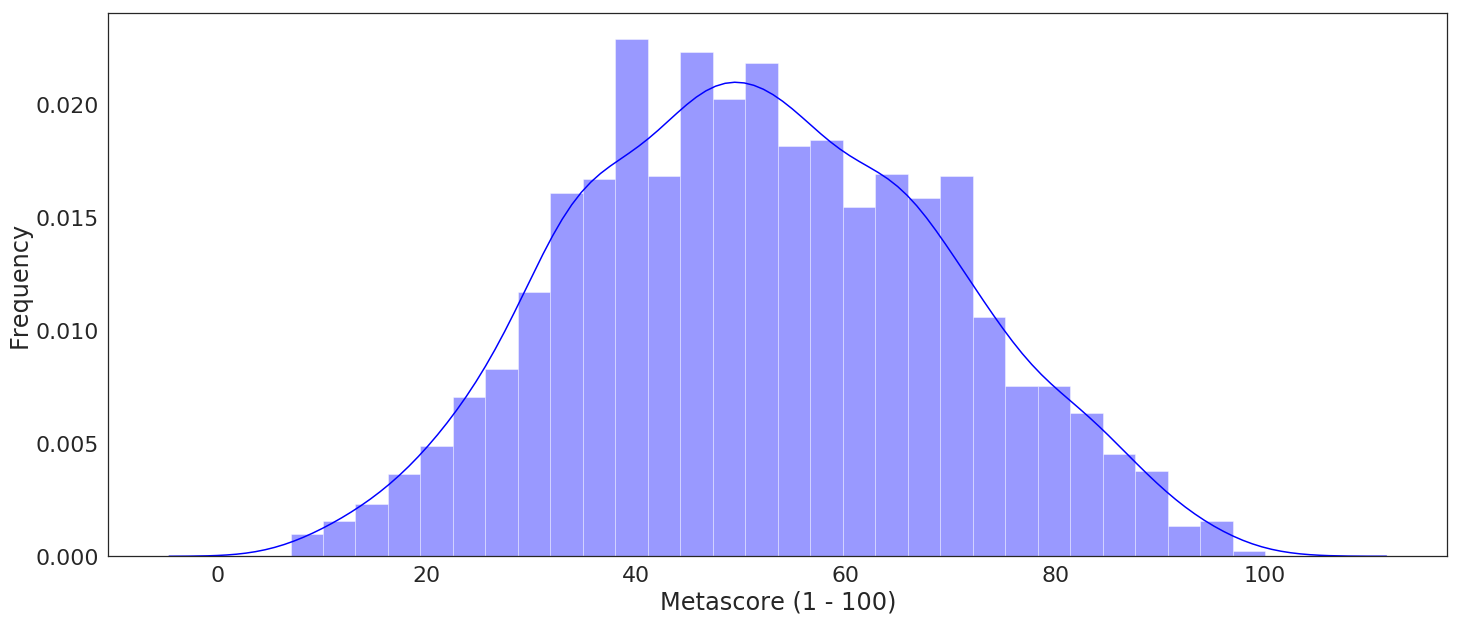

In [75]:
meta_dis = sns.distplot(dataset['metascore'],kde=True, bins=30, color="blue") #plot the metascore distribution
meta_dis.set(xlabel='Metascore (1 - 100)', ylabel='Frequency')

Here we can see that the metascore followS a normal distribution, with a majority of scores being in the 40 - 60 range, and a dropoff towards both ends of the extremes. This is a reflection of a majority of average films in the market, with some really poorly made films and a few really high quality films that received high professional ratings. Because it follows a normal distribution, it would be convenient to be used in a linear transformation.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Budget ($)')]

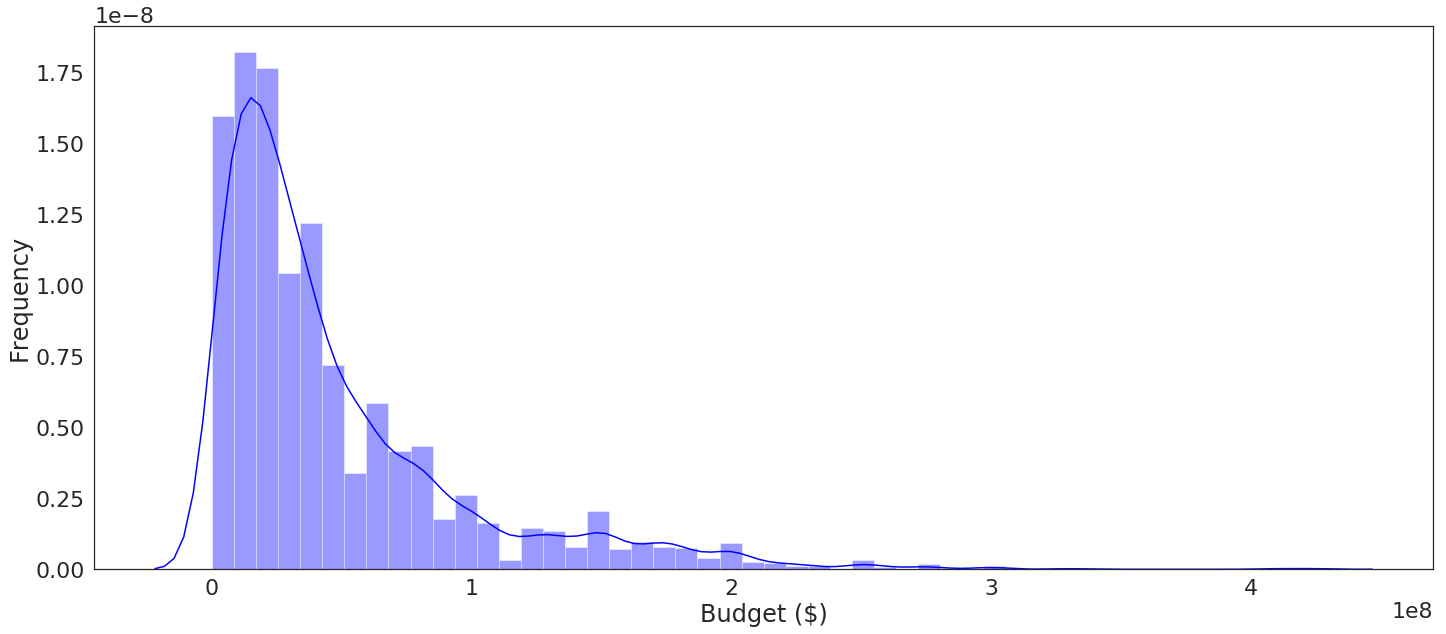

In [76]:
#plot the metascore distribution
budget_dis = sns.distplot(dataset['budget'], 
             kde=True, bins=50, color="blue")
budget_dis.set(xlabel='Budget ($)', ylabel='Frequency')

In [46]:
dataset[dataset['budget'] > 400000000]

,metascore,budget,month,year,worldwide_gross,domestic_gross,domestic_log10,budget_log10,worldwide_gross_log10
0,83,425000000,12,2009,2776340000,760500000,8.881099,8.628389,9.443473
101,45,410600000,5,2011,1045660000,241070000,8.382143,8.613419,9.019390


The budget variable is heavily right skewed. The majority of films have a budget lower than 100 million dollars, while there are a few big productions films that have more than 200 million budget. The few outliers to the right of the distribution (eg. Avatar & Pirates of the caribbean on stranger tides) might influence our prediction, but since high budget films also yield higher revenues, we decide not to delete the outliers but keep them in the data.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Domestic_gross ($)')]

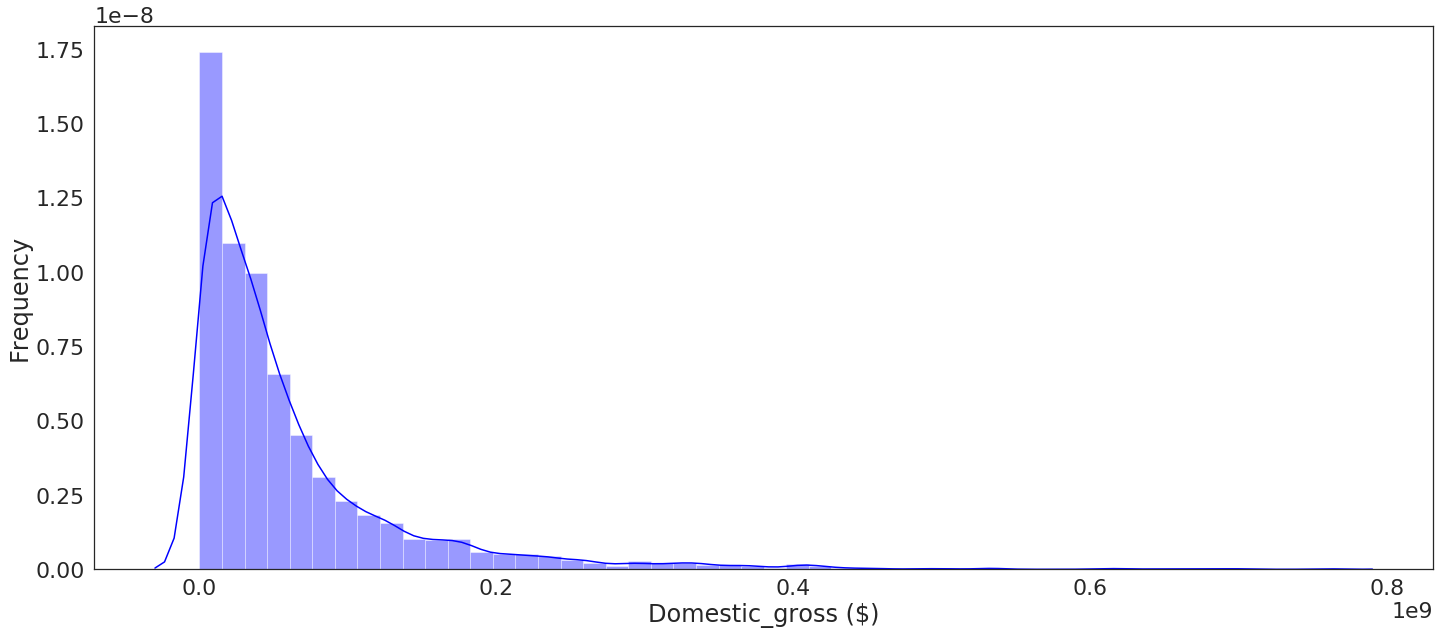

In [77]:
domestic_dis = sns.distplot(dataset['domestic_gross'], 
             kde=True, bins=50, color="blue")
domestic_dis.set(xlabel='Domestic_gross ($)', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Worldwide Gross ($)')]

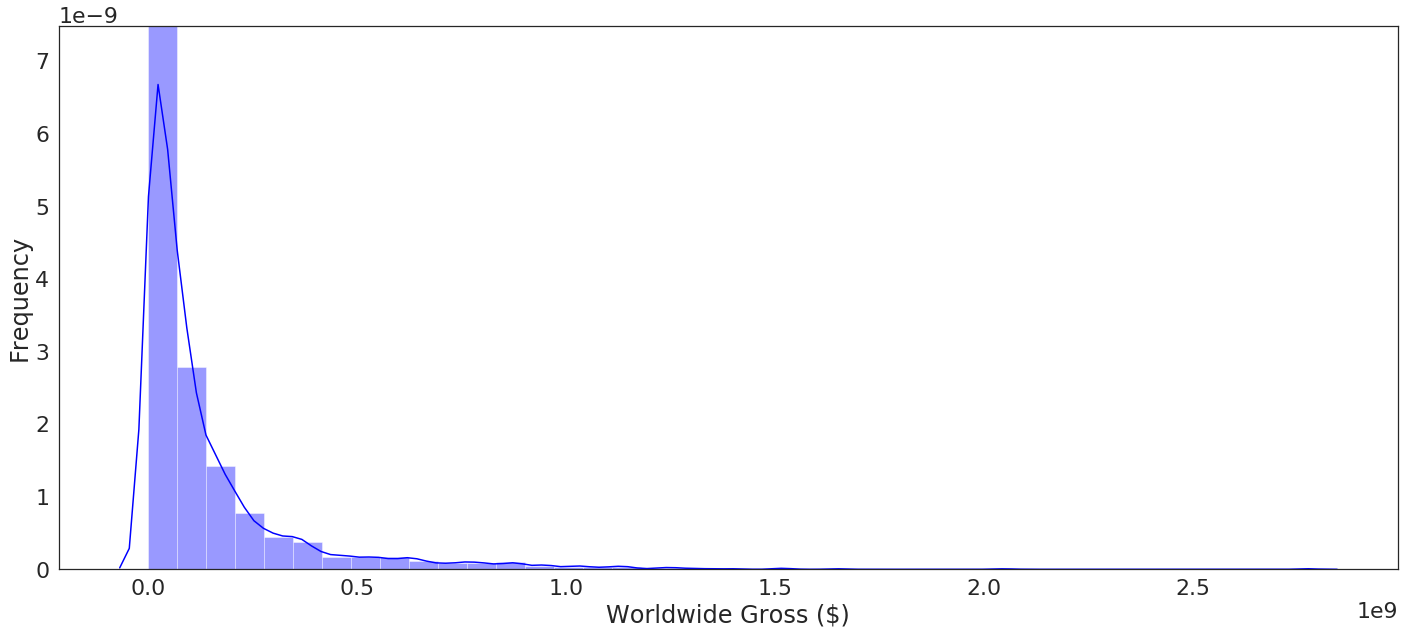

In [78]:
ww_dis = sns.distplot(dataset['worldwide_gross'], 
             kde=True, bins=40, color="blue")
ww_dis.set(xlabel='Worldwide Gross ($)', ylabel='Frequency')

We can see that both domestic and worldwide gross are right skewed, with a long tail to the right indicating a few films that make billions.

As we are doing linear regression in the data analysis, it makes sense to perform a log transformation on the budget, worldwide revenue and domestic revenue. And we firstly did the log transformation. However, a log transformation normalized the data, but it actually yeilded lower R square in the linear model. This will be mentioned below. So we mostly present our linear model without the log transformation.

Let's have a look at the if the month of release influence the movie revenue.

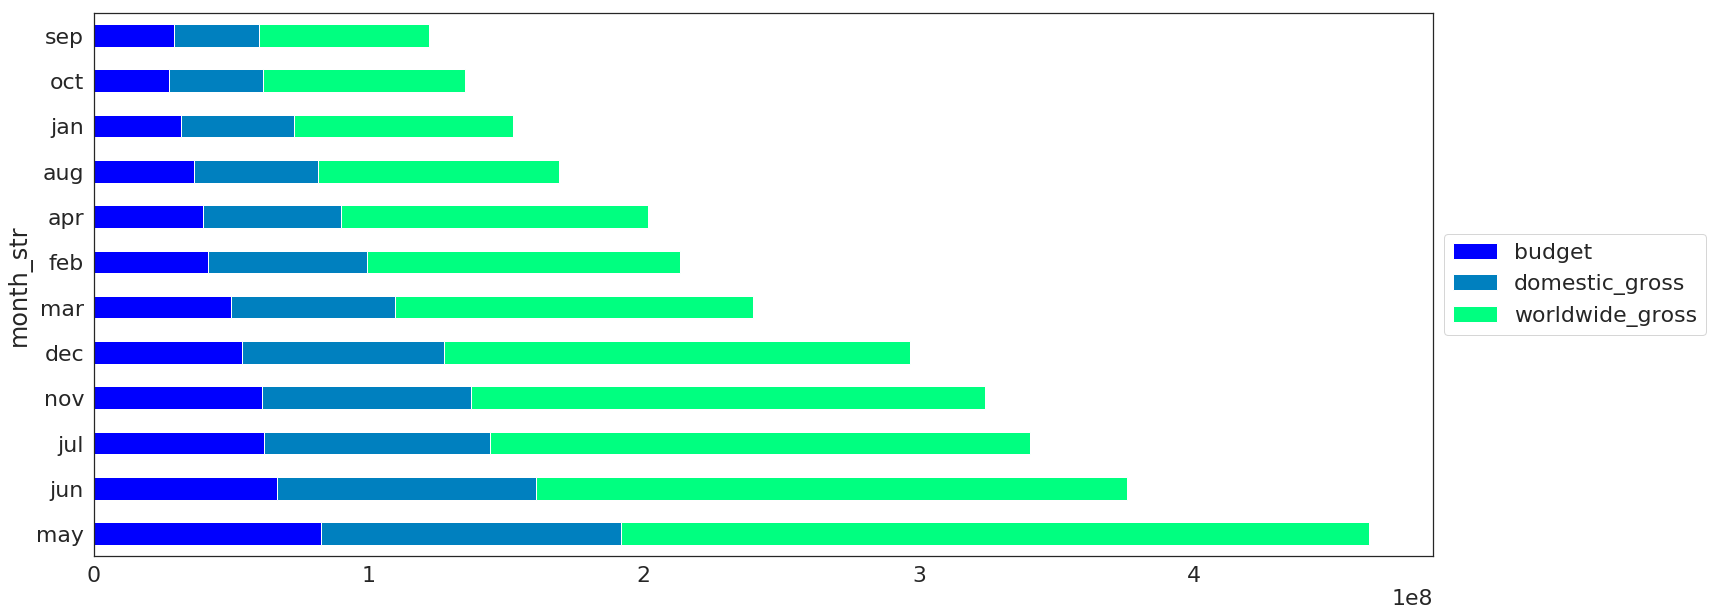

In [79]:
grouped = dataset.groupby(['month_str']).agg({'budget':np.mean,'domestic_gross': np.mean,'worldwide_gross': np.mean}).reset_index()
gpby_month =grouped.groupby(['month_str']).agg({'budget':np.mean,'domestic_gross': np.mean,'worldwide_gross': np.mean}).sort_values('domestic_gross', ascending=False)

gpby_month.plot.barh(stacked=True, colormap='winter').legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Here we can see that, the month associated with the highest budget and revenue (May & June) and the lowest month (September) differentiate in a huge degree. As May, June, July are the summer season and November, December are the award season (Oscar, Golden Globe, etc), it makes sense that movies released then have higher production and gross. So month should influence the gross in our linear model to different degrees. 

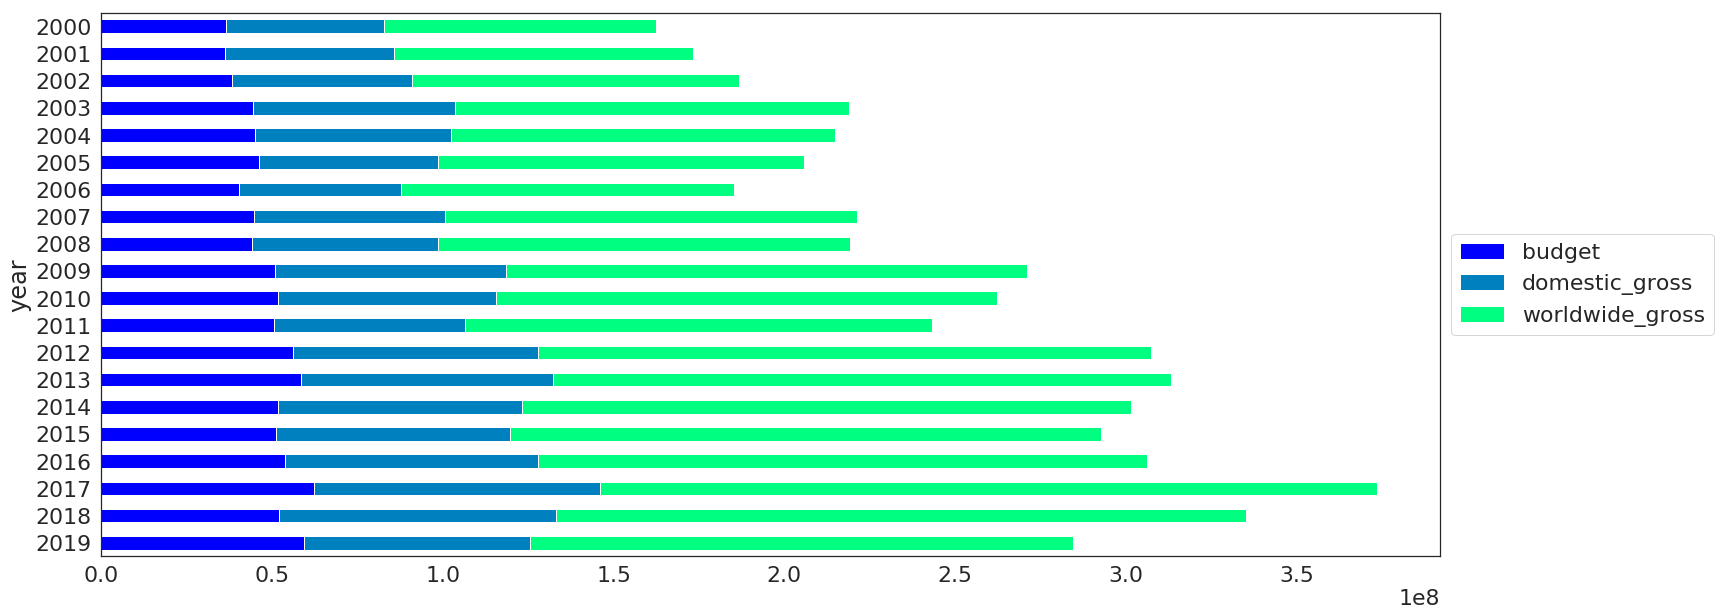

In [80]:
grouped_y = dataset.groupby(['year']).agg({'budget':np.mean,'domestic_gross': np.mean,'worldwide_gross': np.mean}).reset_index()
gpby_year = grouped_y.groupby(['year']).agg({'budget':np.mean,'domestic_gross': np.mean,'worldwide_gross': np.mean}).sort_values('year', ascending=False)

gpby_year.plot.barh(stacked=True, colormap='winter').legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

As we have a look at the year trend, we generally see a increase in both budget and gross, with little variations amoung certain years as some years have more big production films while other years do not. Generally speaking, the film produced in future years will make more profit than the film produced years ago. Thus we include the year as an ordinal variable to account for the general growth of movie market and inflation, but it's hard to predict which future year will have relatively higher revenue or which year has a lower revenue.

Lastly, we make a scatter plot to see if the relationships between variables before we perform any transformation.

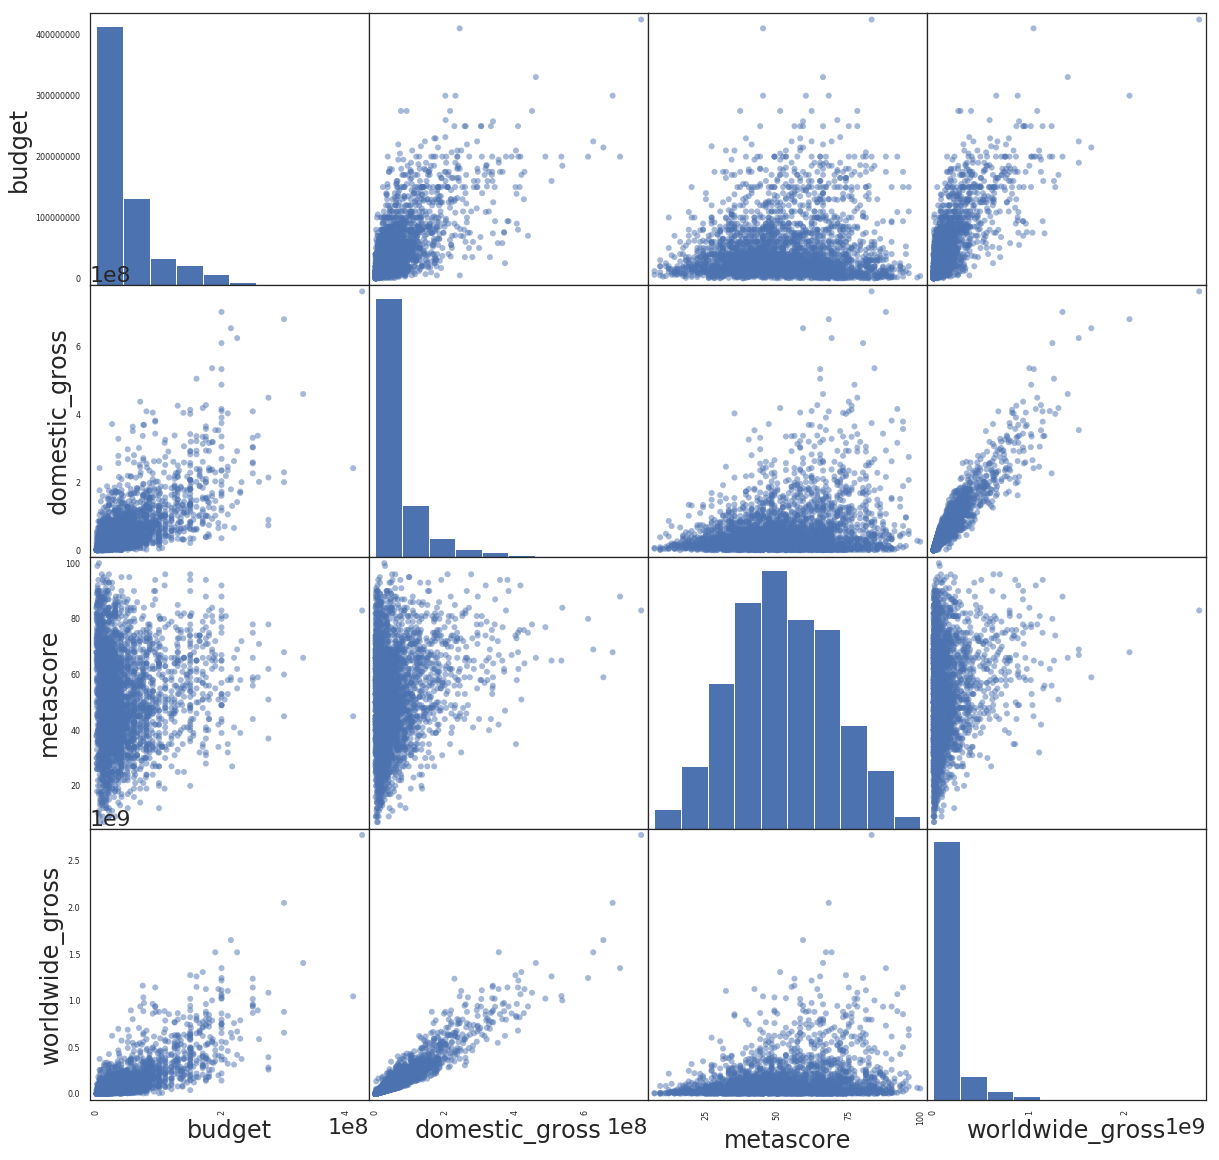

In [27]:
relationship = pd.plotting.scatter_matrix (dataset[['budget','domestic_gross','metascore','worldwide_gross']],figsize=[20,20],marker=15)
relationship = plt.gcf()

We see that a higher budget correlates to higher domestic and worldwide gross. However, it is hard to tell how the metascore is influencing the revenue.

This again shows that budget can be a good predictor of revenue. But to discover this relationship in more detail, we need to perform a linear transformation.

Exploring the influence of genre

(We used another dataset from the fourth project mentioned in the background to have a look at the influence of genres. However, as there are too many possible combinations of genres, and we didn't find a way to categorize all of them, we didn't put them into the linear regression model. But we can still have a look at how they influence revenue.)

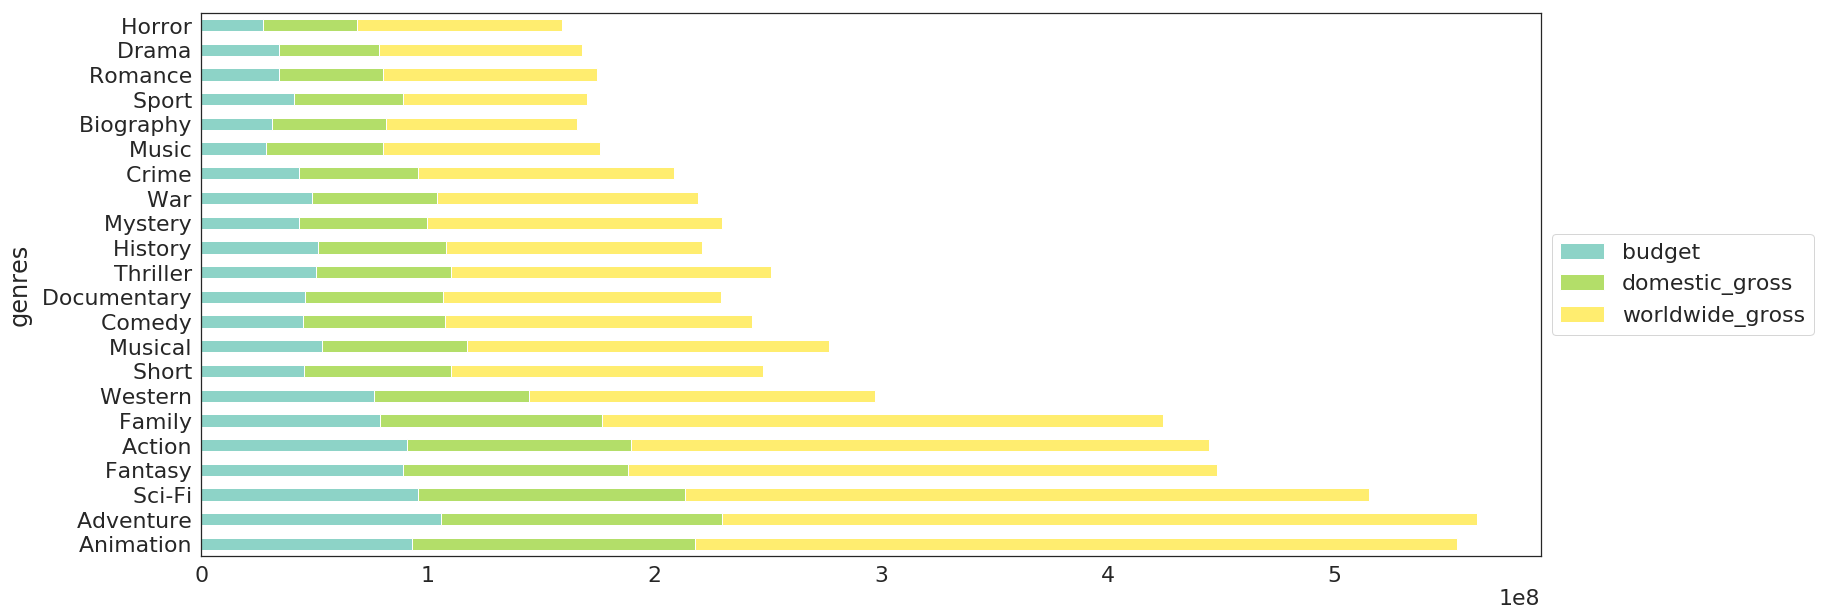

In [109]:
s = dataset_genre['genres'].str.split(';').apply(pd.Series, 1).stack()
s.index =s.index.droplevel(-1) # drop the second level to line up with my_df index
s.name = 'genres' # needed for the join with my_df

genre = dataset_genre.drop('genres', axis =1) # delete the genres column from df 
genre = genre.join(s)

gpby_genres = genre.groupby(['genres']).agg({'budget':np.mean,'domestic_gross': np.mean,'worldwide_gross': np.mean}).sort_values('domestic_gross', ascending=False)
gpby_genres.plot.barh(stacked =True, colormap ='Set3').legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Adventure, animation, sci-fi, and fantasy generally have larger budget and gross. So genre of the film do influence the gross of a film. But as there are so many possible combinations of genres of a film (and nowadays, it's getting harder and harder to attach a specific genre to a film), we didn't manage to include the genre as a variable. 

# Data Analysis & Results

We firstly test the normality of the metascore distribution.

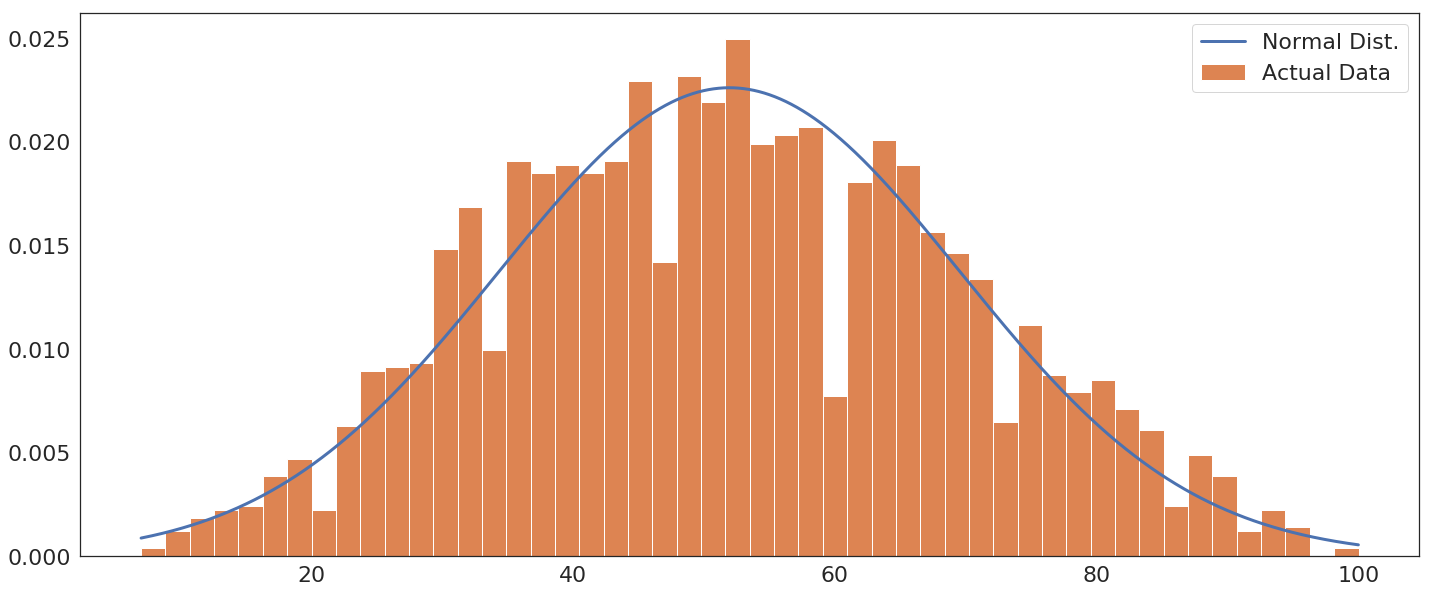

In [84]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
# The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
d2 = dataset['metascore']
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d2, 50, density=True, label='Actual Data')
plt.legend();

Here we set up a function to test if we have evidence to reject the null hypothesis that the distribution is normal.

In [85]:
# Set up a helper function for checking p-values against an alpha level, and printing result
def check_p_val(p_val, alpha):
    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

Then we use the function and the normaltest function to test the distribution.

In [86]:
# Run normal test on the data
stat, p_val = normaltest(d2)

# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val, alpha=0.05)


Normaltest p value is: 4.86e-13 

We have evidence to reject the null hypothesis.


Here the p value is really small even though our distribution doesn't seem to differ a lot from the normal distribution, and doing another log transformation doesn't help to make it more normal. So we just keep it as it is and move on. 

Next, we test for the distribution of movie revenue.

In [88]:
# Run normal test on the data
stat1, p_val1 = normaltest(dataset['domestic_gross'])

# Check the p-value of the normaltest
print('\nNormaltest p value is: {:1.2e} \n'.format(p_val1))

# With alpha value of 0.05, how should we proceed
check_p_val(p_val1, alpha=0.05)


Normaltest p value is: 0.00e+00 

We have evidence to reject the null hypothesis.


So the revenue distribution is not normally distributed. We need to perform a log transformation to make it normal.

In [146]:
# log transform with a 0.1 offset
dataset['domestic_log10'] = np.log10(dataset['domestic_gross']+0.1 )

After the transformation, we test the distribution again.

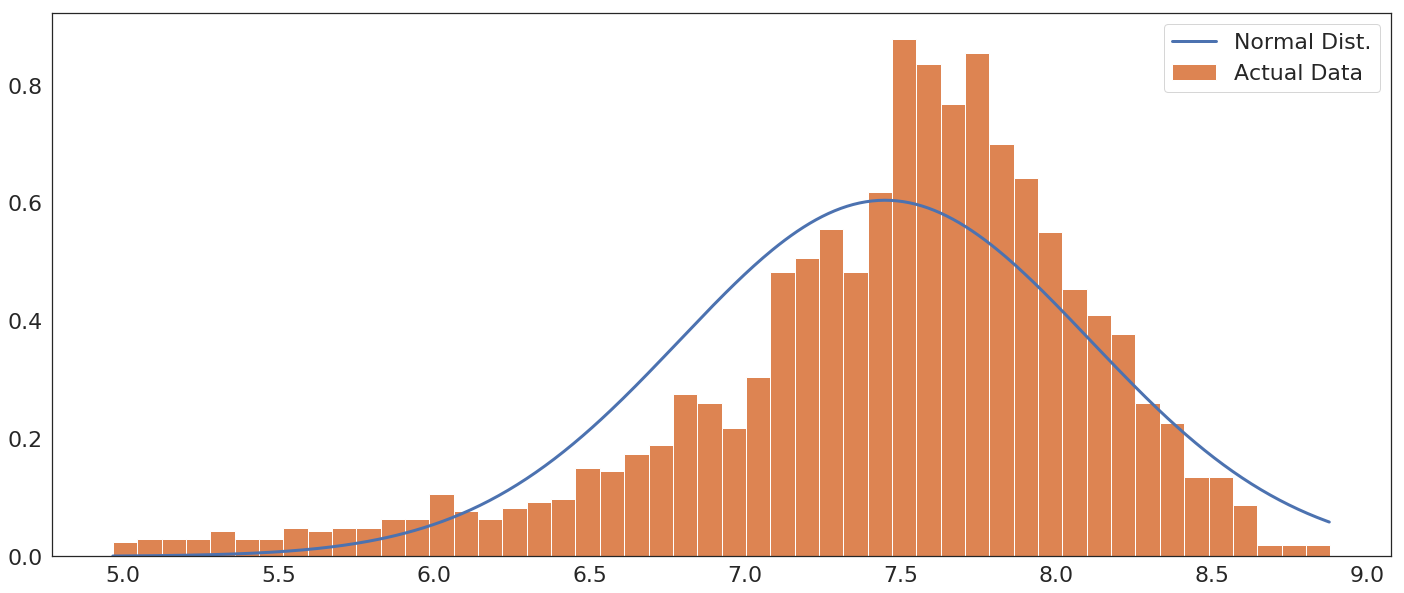

In [90]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
#  The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(dataset['domestic_log10'].min(), dataset['domestic_log10'].max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(dataset['domestic_log10']), np.std(dataset['domestic_log10']))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(dataset['domestic_log10'], 50, density=True, label='Actual Data')
plt.legend();

Here again, testing normality failed but the distribution is way better than the intial heavily right skewed distribution, so we use this in our model.

Similarly, we transform the budget and the worldwide gross data.

In [147]:
# log transform with a 0.1 offset
dataset['budget_log10'] = np.log10(dataset['budget']+0.1)
dataset['worldwide_gross_log10'] = np.log10(dataset['worldwide_gross']+0.1)
d5 = dataset['budget_log10']

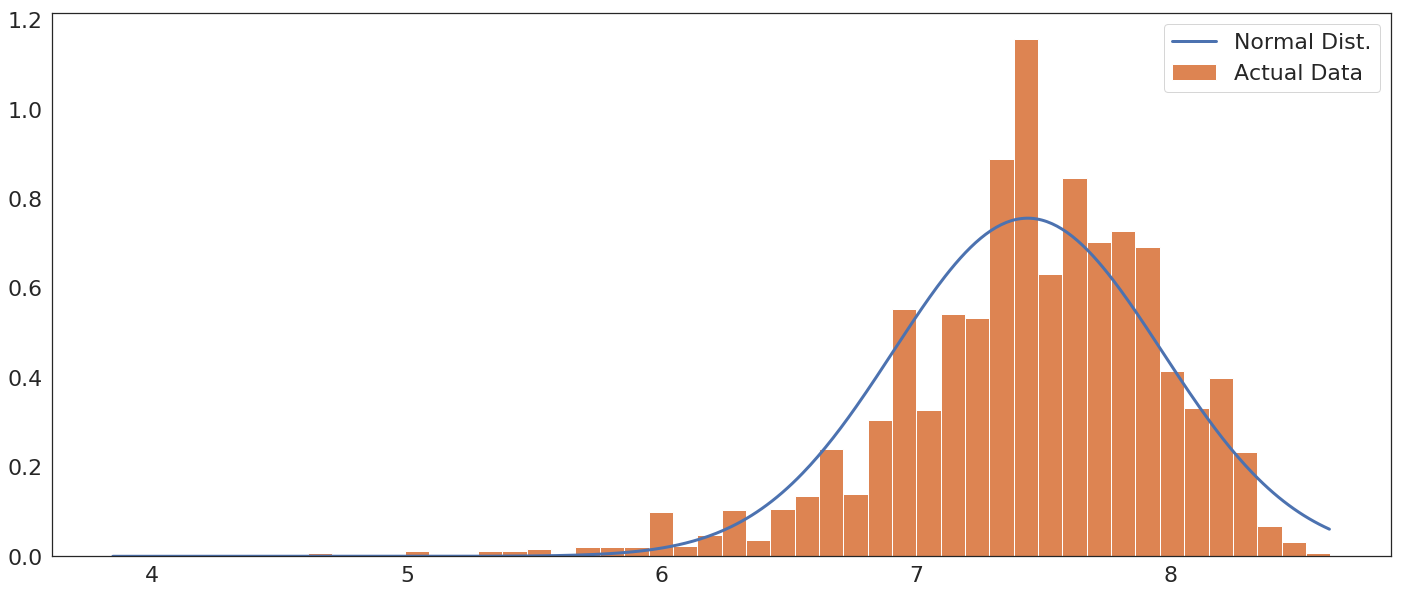

In [92]:
# Plot the data with with expected distribution, under the hypothesis that it is normally distributed. 
# The blue line is the expected data density, with the same mean and standard deviation, if the data are normal. 
xs = np.arange(d5.min(), d5.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d5), np.std(d5))
plt.plot(xs, fit, label='Normal Dist.', lw=3)
plt.hist(d5, 50, density=True, label='Actual Data')
plt.legend();

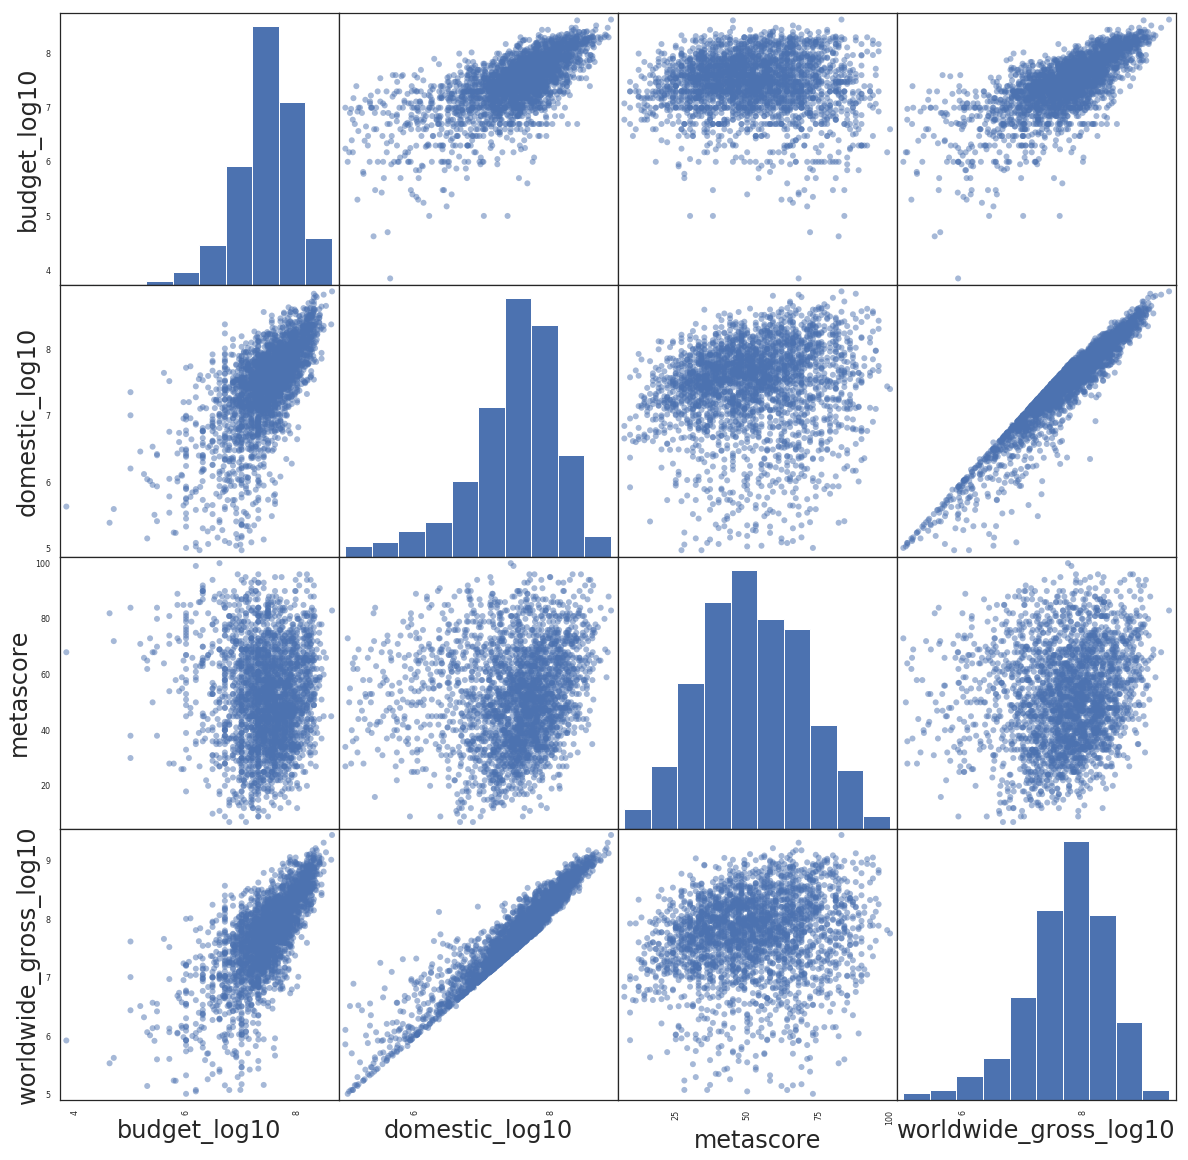

In [148]:
relationship_log = pd.plotting.scatter_matrix(dataset[['budget_log10','domestic_log10','metascore','worldwide_gross_log10']],figsize=[20,20],marker=15)
relationship_log = plt.gcf()

When we plot their relationship again, we can see a shifted distribution, but the linear relationship still remains.

In [149]:
dataset.head()

,metascore,budget,month_num,month_str,year,domestic_gross,worldwide_gross,domestic_log10,budget_log10,worldwide_gross_log10
0,83,425000000,12,dec,2009,760507625,2776345279,8.881104,8.628389,9.443473
1,88,200000000,2,feb,2018,700059566,1348258224,8.845135,8.301030,9.129773
2,68,300000000,4,apr,2018,678815482,2048134200,8.831752,8.477121,9.311358
3,59,215000000,6,jun,2015,652270625,1648854864,8.814428,8.332438,9.217182
4,69,225000000,5,may,2012,623357910,1517935897,8.794737,8.352183,9.181253


Next, we start the linear regression.

1. Generating linear model using machine learning approach:

VarIables: budget (without log transformation), metascore, month, and year 

Dependent variable: domestic gross, and worldwide gross.

In [137]:
# Use One-Hot encoding for the month column in order to analyze each month individually
dataset_ml = pd.get_dummies(dataset, columns=['month_str']) 

X = dataset_ml.drop(['domestic_gross', 'worldwide_gross'], axis=1).values
trials = 10
# Reset averages
d_train_avg = 0
d_test_avg = 0
w_train_avg = 0
w_test_avg = 0
for i in range(trials):
    Y_d = dataset_ml['domestic_gross'].values
    Y_w = dataset_ml['worldwide_gross'].values
    X_d_train, X_d_test, Y_d_train, Y_d_test = model_selection.train_test_split(X, Y_d, test_size=.2, random_state=i)
    X_w_train, X_w_test, Y_w_train, Y_w_test = model_selection.train_test_split(X, Y_w, test_size=.2, random_state=i)
        
    model_d=LinearRegression().fit(X_d_train, Y_d_train)
    d_test_avg = d_test_avg + model_d.score(X_d_test, Y_d_test)
    d_train_avg = d_train_avg + model_d.score(X_d_train, Y_d_train)
        
    model_w=LinearRegression().fit(X_w_train, Y_w_train)
    w_test_avg = w_test_avg + model_w.score(X_w_test, Y_w_test)
    w_train_avg = w_train_avg + model_w.score(X_w_train, Y_w_train)

print("Domestic Gross:\n\tTrain: %f\n\tTest: %f" % (d_train_avg/trials, d_test_avg/trials))
print("Worldwide Gross:\n\tTrain: %f\n\tTest: %f" % (w_train_avg/trials, d_test_avg/trials))
print(model_d.coef_)
print(model_w.coef_)

Domestic Gross:
	Train: 0.524439
	Test: 0.504686
Worldwide Gross:
	Train: 0.612921
	Test: 0.504686
[  9.00443780e+05   1.04364988e+00  -1.29761147e+06   9.30202739e+04
  -1.84310107e+06  -1.29517005e+06   4.60726331e+06   3.53152602e+06
  -1.74364954e+06   2.94824057e+06   2.86320200e+06  -5.84729469e+06
   8.46267005e+06   1.64947549e+06  -4.90454274e+06  -8.42861935e+06]
[  1.94157463e+06   3.13793733e+00  -1.51252146e+06   2.50143291e+06
   8.59526517e+05  -9.05783258e+06   5.61109080e+06   1.65771825e+06
   1.04761600e+06   1.13540285e+07  -3.98449038e+06  -1.62239625e+07
   2.30598174e+07   2.03622073e+06  -1.54339889e+06  -1.48163339e+07]


2. Generating linear model using OLS linear regression

In [139]:
dataset_onehot = dataset.copy()

lb = LabelBinarizer()
lb_results = lb.fit_transform(dataset_onehot['month_str'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

result_df = pd.concat([dataset_onehot, lb_results_df], axis=1)

result_df['year_ordinal'] = (result_df['year'] - 2000).astype(int)

2.1 OLS model: worldwide gross and budget without log transformation

In [140]:
outcome, predictors = patsy.dmatrices('worldwide_gross ~ budget+metascore+jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec+year_ordinal', result_df)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     295.8
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:33:40   Log-Likelihood:                -53227.
No. Observations:                2646   AIC:                         1.065e+05
Df Residuals:                    2631   BIC:                         1.066e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.167e+08    8.3e+06    -14.062   

2.2 OLS: domestic gross ~ budget without log transformation

In [141]:
outcome, predictors = patsy.dmatrices('domestic_gross ~ budget+metascore+jan+feb+mar+apr+may+jun+jul+aug+sep+oct+nov+dec+year_ordinal', result_df)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:34:31   Log-Likelihood:                -50874.
No. Observations:                2646   AIC:                         1.018e+05
Df Residuals:                    2631   BIC:                         1.019e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.081e+07   3.41e+06     -9.031   

2.3 OLS: worldwide gross and budget with log transformation

In [99]:
outcome, predictors = patsy.dmatrices('worldwide_gross_log10 ~ budget_log10+metascore+jan+feb+mar+'+
                                      'apr+may+jun+jul+aug+sep+oct+nov+dec+year_ordinal', result_df)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)
# fit the model
res_log = mod_log.fit()

print(res_log.summary())

                              OLS Regression Results                             
Dep. Variable:     worldwide_gross_log10   R-squared:                       0.568
Model:                               OLS   Adj. R-squared:                  0.566
Method:                    Least Squares   F-statistic:                     247.6
Date:                   Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                           10:16:23   Log-Likelihood:                -1720.1
No. Observations:                   2646   AIC:                             3470.
Df Residuals:                       2631   BIC:                             3558.
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

# Ethics & Privacy

There were several ethics and privacy concerns during our data collection, storage, analysis, modeling, and development process: 

First, collection bias during data collection. We only use two sources and not all films from 2000 to 2019 are included. Some film companies do not report either the budget of the movies or the revenue generated. Thus, we ended up missing some important raw dataset. Besides this, we have suspected that, not all the data provided are accurate. For example, sometimes film companies can decide to lower their reported revenues to avoid paying higher taxes. 

Second, data security during data storage. We do not have a plan to protect and secure the movie data through for instance encryption. 

Third, there are definitely missing perspectives during our data analysis. We only use metacritics scores from the internet, not from other relevant stakeholders like regular customers to address the full picture of the success of a movie. This also leads to a concern in fairness across groups during data modeling since only using metascores have inherently metric selection bias.

Fourth, unintended use and the right to be forgotten during data development. These concerns mean that we have not taken steps to identify and prevent unintended uses and possible abuse of our model. We also do not have a mechanism through which certain movie maker companies can request their personal information to be removed.

Fifth, as our linear model is limited, if it is used as a reference to prepare for film expecting a good box office score, it would't be a reliable enough predictor. Even though budget seems to be a good predictor of gross, only increasing the budget of a film would not guarentee a higher revenue. Relying to much on linear model like this when planning for film production can make movie producers neglect other factors of a good film.

With all of these existed biases in mind, we still manage to ameliorate some other aspects of ethics and privacy issues.

First, we removed the title of films as they were not relevant to the data analysis

Second, we examine the data for possible sources of bias and take steps to mitigate or address these biases during data analysis to miniaturize dataset bias. We check for stereotype perpetuation, confirmation bias, imbalanced classes and confounding variables, getting down the size of our dataset to 2637. 

Lastly, since all of the data we use are publically available, we do not need to have a data retention plan during data storage, so there isn’t a concern specific to deleting the data after they are no longer needed.

# Conclusion & Discussion

We generated linear models using OLS and machine learning, utilizing variables with and without log transformation to predict either international or domestic gross. Looking at model 2.1 (budget & metascore without log transformations predicting international gross), the model has a maximum R2 value of 0.612, meaning that it explains 61.2% of the variation of our data. 

The machine learning model also has an accuracy of 61.29% on training data and an accuracy of 50.47 % on testing data. From this model, we can write a simple equation for international gross revenue: 
Gross Revenue = Budget x 3.0825 + Metascore x 1.87 x 10^6 + month x coefficient + year x 2.532 x 10^6.

From this equation we can predict that each dollar increase in movie budget leads to a 3 dollar profit increase. The p value of both variables is very low (0.000), signifying a statistically significant t statistic; meaning that both budget and ratings are good predictors of international gross profit so we can reject the null hypothesis that the coefficient has no effect. Both budget and metascore are good predictors of worldwide gross as the predictor's value are related to changes in the response variable. 

The month variable, we see that certain months have a positive correlation with worldwide gross (May, June, Jan, with positive coefficient), while other month have a negative relationship. However, not all month have a significant p value (only March, Auguest - October), which means they are not good predictors in the model. So it is very hard to conclude what is the influence of release month on worldwide gross.

The year variable has a significant p value and a positive coefficient, meaning that films the amount of money a movie makes is positively correlated with its release date.


Discussion & limitations:

This conclusion agrees with our initial hypothesis and general common sense, that higher budget & movie rating scores yield greater revenue and month has different degrees of influence. Again, budget reflects the amount of preparation of a film.  Meanwhile, this model indicates that metascore, which is the professional ratings posted before the release of the film, also predicts revenue. While sometimes it is hard to distinguish between the spliting reviews given by the audience, generally a better ratings on the website will indicate a higher revenue. So moviemakers should refer to those websites, such as metacritics, to understand the preference of audiences, and plan productions that cater their preference. 

These conclusions agree with out initial hypothesis, that higher budget and ratings yield greater revenue. However, the linear model we generated is imperfect, as we were not able to include more important variables, such as genre, directors, producers, or cast members, ...etc. Our model also only reflects a part of the films on the market. Adding more proper predictors would most likely increase the accuracy of the model. 

Various factors contributed to the potential inaccuracy of our results. Many film companies do not report budget and box office revenues, resulting in missing portions of our raw dataset. Our rating data was taken from Metacritic, leaving the compilation of the final rating to the site. Without access to the process Metacritic uses to arrive at those ratings we cannot be entirely certain of their accuracy. We are also using a linear model, which is limited in its accuracy, and cannot provide a perfect guide.

Since our group learn from the very basic of datascience in this class, we could only do these given the ten weeks of studying and practising. If we have more experience in trying different prediction models, or gathering more comprehensive data and variables, we can improve our prediction model.

Thanks for the hard work of every group member!